# **The SIR Model in Complex Networks**

**Author:** Elishah Candanosa

The present notebook has the objective of simulating pandemics using the SIR model in complex networks. I developed the code in order to obtain the results included in the paper attached to this project, coauthored by Maximiliano Rojas.



# Required Libraries

Comment this if you prefer.

In [ ]:
!pip install networkx numpy matplotlib

#Main Algorithm

In this section I computationally apply the model Maximiliano and I proposed in the paper choosing as patient zero the node with the **highest degree centrality**. Recreating the classical behaviour of the SIR Model.

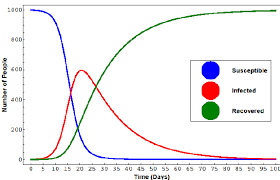

High-degree node: 2, Low-degree node: 32


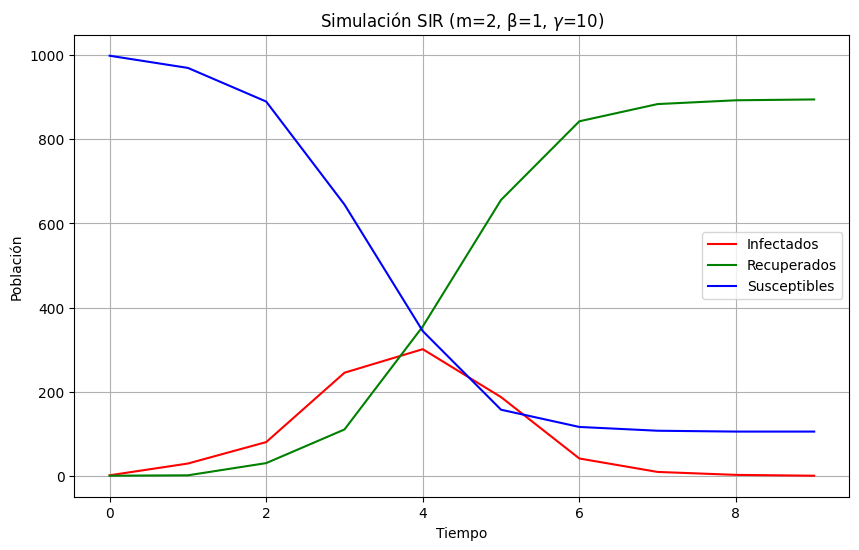

In [8]:
import networkx as nx
import numpy as np
import random
import matplotlib.pyplot as plt

# ------------------------
# Parameters
# ------------------------
N = 1000          # number of nodes
m = 2           # BA network parameter (number of edges per new node)
beta = 1      # infection rate
gamma = 10     # recovery rate
dt = 1.0

p_infect = 1 - np.exp(-beta*dt)
p_recover = 1 - np.exp(-gamma*dt)

# ------------------------
# Build scale-free (Barabási–Albert) network
# ------------------------
G = nx.barabasi_albert_graph(N, m)
# ------------------------
# Compute centrality
# ------------------------
centrality = nx.degree_centrality(G)
high_central_node = max(centrality, key=centrality.get)
low_central_node = min(centrality, key=centrality.get)
print(f"High-degree node: {high_central_node}, Low-degree node: {low_central_node}")

# ------------------------
# SIR simulation function
# ------------------------
def run_sir(G, patient_zero):
    SUS, INF, REC = 0,1,2
    state = [SUS]*N
    state[patient_zero] = INF

    S_list, I_list, R_list = [], [], []

    while INF in state:
        S_list.append(state.count(SUS))
        I_list.append(state.count(INF))
        R_list.append(state.count(REC))

        new_infected = []
        for u, s in enumerate(state):
            if s == INF:
                for v in G.neighbors(u):
                    if state[v] == SUS and random.random() < p_infect:
                        new_infected.append(v)
                if random.random() < p_recover:
                    state[u] = REC
        for v in new_infected:
            if state[v] == SUS:
                state[v] = INF

    # Append last step
    S_list.append(state.count(SUS))
    I_list.append(state.count(INF))
    R_list.append(state.count(REC))

    return S_list, I_list, R_list

# ------------------------
# Run simulations: Assignment of the Patient Zero
# ------------------------
S_high, I_high, R_high = run_sir(G, high_central_node)
S_low, I_low, R_low = run_sir(G, low_central_node)

time_high = list(range(len(I_high)))
time_low = list(range(len(I_low)))

# ------------------------
# Plot results
# ------------------------
plt.figure(figsize=(10,6))
plt.plot(time_high, I_high, 'r-', label='Infectados')
plt.plot(time_high, R_high, 'g-', label='Recuperados')
plt.plot(time_high, S_high, 'b-', label='Susceptibles')
plt.xlabel("Tiempo")
plt.ylabel("Población")
plt.title(rf"Simulación SIR (m={m}, β={beta}, $\gamma$={gamma})")
plt.legend()
plt.grid(True)
plt.show()


# Time Evolution of an infected Population

In this section I am analyzing various stages of a pathogen throughout a specific network, in particular, poorly connected to observe locality in the epidemics. The patient zero is assigned according to the **highest betweenness centrality**.

**The network is created in a different box to the one where the simulation occurs, so as to have the same network throughout different simulations if necessary.**

In [5]:
import networkx as nx
import numpy as np
import random
import matplotlib.pyplot as plt

# ------------------------
# Parameters
# ------------------------
N = 100          # number of nodes
m = 1           # edges per new node
beta = 0.1      # infection rate
gamma = 0.3     # recovery rate
dt = 1.0

p_infect = 1 - np.exp(-beta*dt)
p_recover = 1 - np.exp(-gamma*dt)

random.seed(42)
np.random.seed(42)

# ------------------------
# Build scale-free network
# ------------------------
G = nx.barabasi_albert_graph(N, m)


High-degree node: 0, Low-degree node: 4


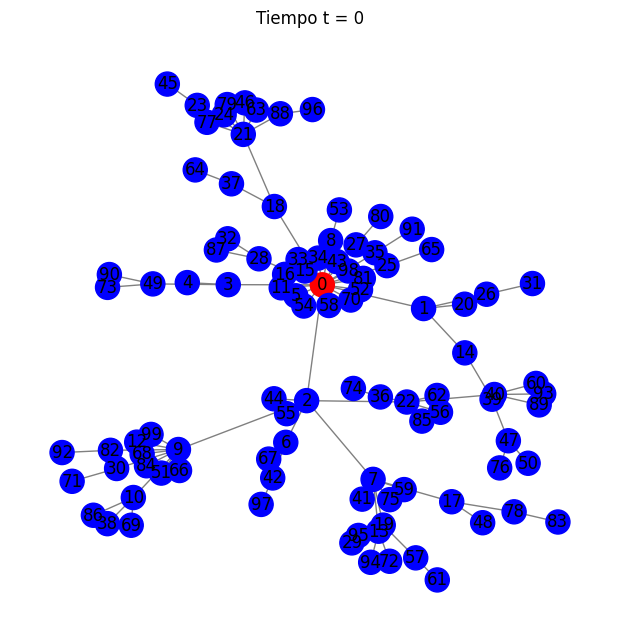

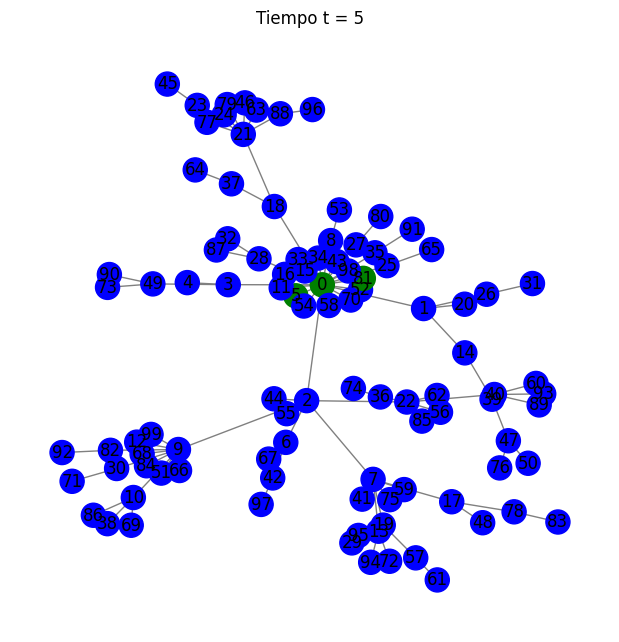

In [6]:


# ------------------------
# Compute centrality
# ------------------------
centrality = nx.betweenness_centrality(G)
high_central_node = max(centrality, key=centrality.get)
low_central_node = min(centrality, key=centrality.get)
print(f"High-degree node: {high_central_node}, Low-degree node: {low_central_node}")

# ------------------------
# SIR simulation (with node state tracking)
# ------------------------
def run_sir_with_snapshots(G, patient_zero):
    SUS, INF, REC = 0,1,2
    state = [SUS]*N
    state[patient_zero] = INF

    state_history = [state.copy()]
    S_list, I_list, R_list = [], [], []

    while INF in state:
        S_list.append(state.count(SUS))
        I_list.append(state.count(INF))
        R_list.append(state.count(REC))

        new_infected = []
        for u, s in enumerate(state):
            if s == INF:
                for v in G.neighbors(u):
                    if state[v] == SUS and random.random() < p_infect:
                        new_infected.append(v)
                if random.random() < p_recover:
                    state[u] = REC
        for v in new_infected:
            if state[v] == SUS:
                state[v] = INF

        state_history.append(state.copy())

    # Append last step
    S_list.append(state.count(SUS))
    I_list.append(state.count(INF))
    R_list.append(state.count(REC))
    state_history.append(state.copy())

    return S_list, I_list, R_list, state_history

# ------------------------
# Drawing function for network state
# ------------------------
def draw_network(G, state, pos=None, title=""):
    if pos is None:
        pos = nx.spring_layout(G, seed=42)

    color_map = {0: 'blue', 1: 'red', 2: 'green'}
    node_colors = [color_map[s] for s in state]

    plt.figure(figsize=(6, 6))
    nx.draw(G, pos, node_color=node_colors, with_labels=True, node_size=300, edge_color='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# ------------------------
# Run simulation
# ------------------------
S_high, I_high, R_high, state_history = run_sir_with_snapshots(G, high_central_node)
time_high = list(range(len(I_high)))

# ------------------------
# Plot snapshots of the network at selected time points
# ------------------------
pos = nx.spring_layout(G, seed=42)  # consistent layout

steps_to_plot = [0, 10, 20,30,40, len(state_history) - 1]
for step in steps_to_plot:
    if step < len(state_history):
        draw_network(G, state_history[step], pos, title=f"Tiempo t = {step}")


# Evolution of the Population with multiple Patients Zero

This section serves the same purpose as that of the previous visualization-in-stages part, with the exceptions of now focusing on the ultimate stage (when there are no longer affected people) and now assigning the three highest centralities (degree, eigenvector, betweenness, closeness, Katz and Load) as patients zero, but with a shift, as in this network, and society in general, the raw highest degree nodes in one centrality are bound to rank the highest in another one.

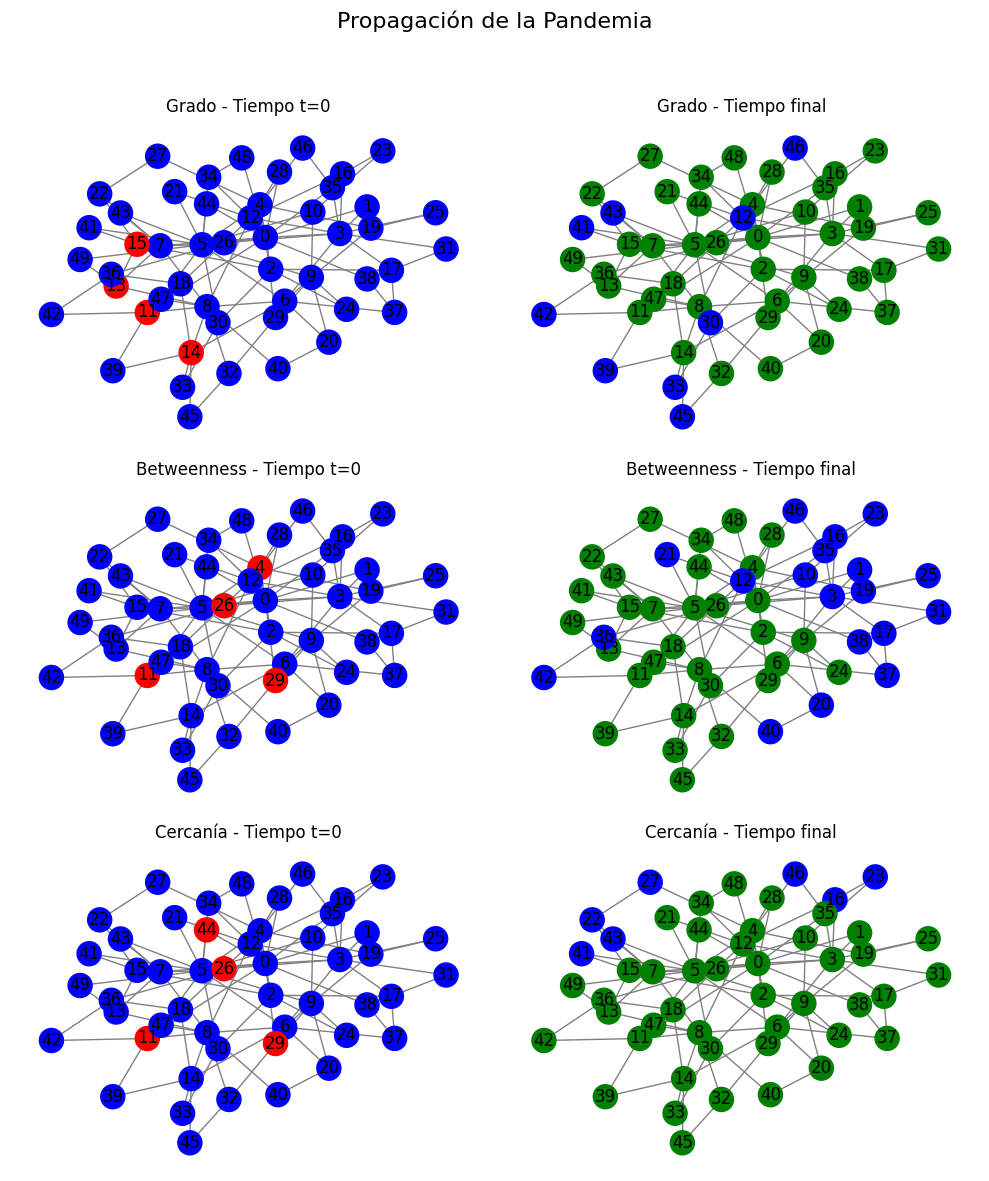

In [7]:
#Patients Zero: Degree, Betweenness, Closeness
#Ranking: HIGHEST
#Shift: 10

import networkx as nx
import numpy as np
import random
import matplotlib.pyplot as plt

# ------------------------
# Parameters
# ------------------------
N = 50
m = 2
beta = 0.1
gamma = 0.1
dt = 1.0

p_infect = 1 - np.exp(-beta * dt)
p_recover = 1 - np.exp(-gamma * dt)

# ------------------------
# Build graph and layout
# ------------------------
G = nx.barabasi_albert_graph(N, m)
pos = nx.spring_layout(G, seed=42)

# ------------------------
# Centrality measures
# ------------------------
centrality_measures = {
    "Grado": nx.degree_centrality(G),
    "Betweenness": nx.betweenness_centrality(G),
    "Cercanía": nx.closeness_centrality(G),
}

# ------------------------
# SIR Simulation
# ------------------------
def run_sir_with_snapshots(G, patient_zeros):
    SUS, INF, REC = 0, 1, 2
    state = [SUS] * N
    for node in patient_zeros:
        state[node] = INF

    history = [state.copy()]
    t = 0

    while INF in state:
        new_infected = []
        for u, s in enumerate(state):
            if s == INF:
                for v in G.neighbors(u):
                    if state[v] == SUS and random.random() < p_infect:
                        new_infected.append(v)
                if random.random() < p_recover:
                    state[u] = REC
        for v in new_infected:
            if state[v] == SUS:
                state[v] = INF
        t += 1
        history.append(state.copy())

    return history, t

# ------------------------
# Draw Network
# ------------------------
def draw_network(G, state, pos, title=""):
    color_map = {0: 'blue', 1: 'red', 2: 'green'}
    node_colors = [color_map[s] for s in state]
    nx.draw(G, pos, node_color=node_colors, with_labels=True, node_size=300, edge_color='gray')
    plt.title(title)
    plt.axis('off')

# ------------------------
# Visualize: Bottom Nodes as Patient Zeros
# ------------------------
bottom_k = 4
shift=10
rows = len(centrality_measures)
fig, axs = plt.subplots(rows, 2, figsize=(10, 4 * rows))

if rows == 1:
    axs = np.array([axs])

for i, (name, cent) in enumerate(centrality_measures.items()):
    sorted_nodes = sorted(cent, key=cent.get, reverse=True)
    bottom_nodes = sorted_nodes[shift:shift+bottom_k]

    history, t_final = run_sir_with_snapshots(G, bottom_nodes)

    axs[i, 0].cla()
    plt.sca(axs[i, 0])
    draw_network(G, history[0], pos, title=f"{name} - Tiempo t=0")

    axs[i, 1].cla()
    plt.sca(axs[i, 1])
    draw_network(G, history[-1], pos, title=f"{name} - Tiempo final")

plt.suptitle("Propagación de la Pandemia", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


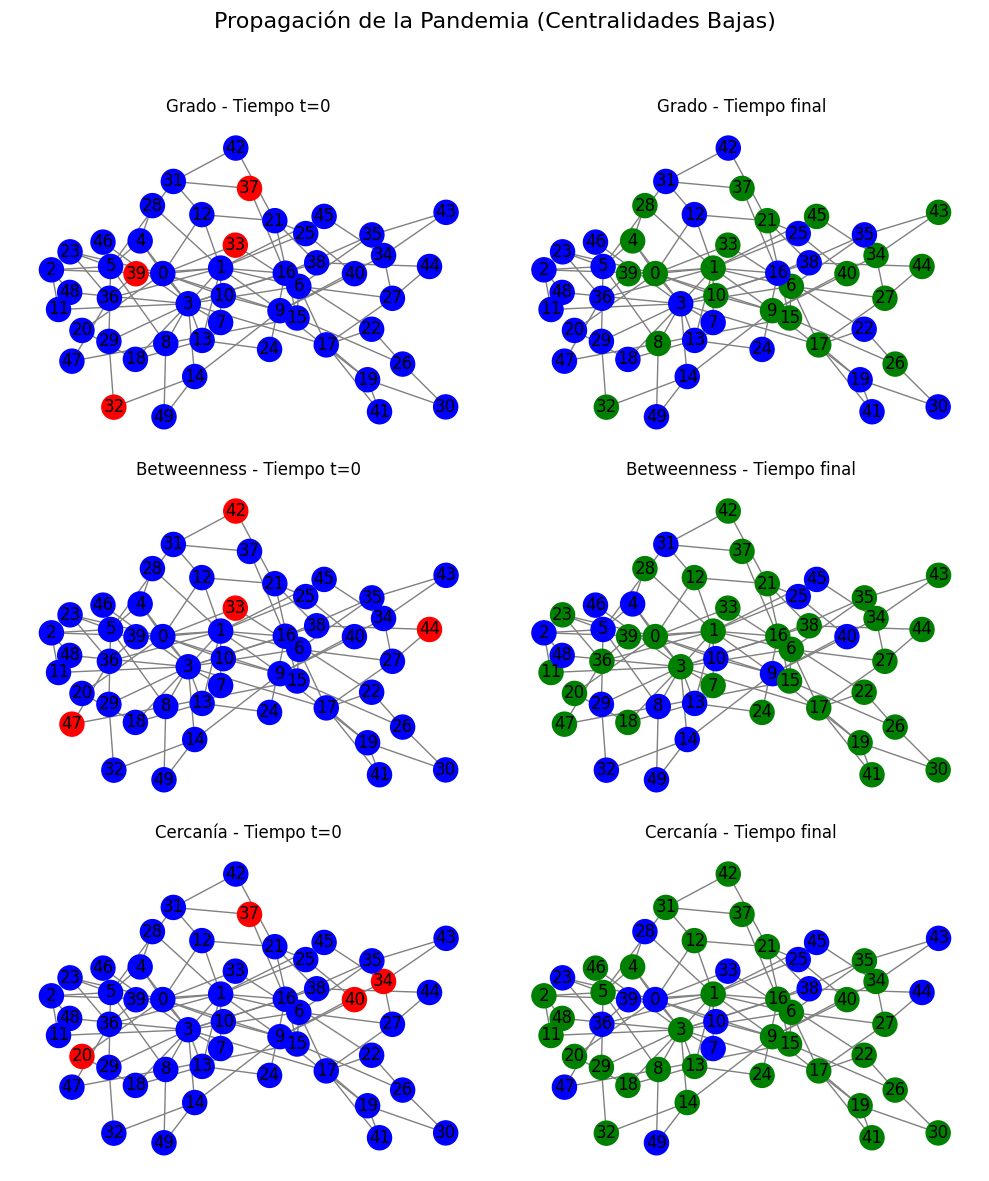

In [ ]:
#Patients Zero: Degree, Betweenness, Closeness
#Ranking: LOWEST
#Shift: 10

import networkx as nx
import numpy as np
import random
import matplotlib.pyplot as plt

# ------------------------
# Parameters
# ------------------------
N = 50
m = 2
beta = 0.05
gamma = 0.1
dt = 1.0

p_infect = 1 - np.exp(-beta * dt)
p_recover = 1 - np.exp(-gamma * dt)

# ------------------------
# Build graph and layout
# ------------------------
G = nx.barabasi_albert_graph(N, m)
pos = nx.spring_layout(G, seed=42)

# ------------------------
# Centrality measures
# ------------------------
centrality_measures = {
    "Grado": nx.degree_centrality(G),
    "Betweenness": nx.betweenness_centrality(G),
    "Cercanía": nx.closeness_centrality(G),
}

# ------------------------
# SIR Simulation
# ------------------------
def run_sir_with_snapshots(G, patient_zeros):
    SUS, INF, REC = 0, 1, 2
    state = [SUS] * N
    for node in patient_zeros:
        state[node] = INF

    history = [state.copy()]
    t = 0

    while INF in state:
        new_infected = []
        for u, s in enumerate(state):
            if s == INF:
                for v in G.neighbors(u):
                    if state[v] == SUS and random.random() < p_infect:
                        new_infected.append(v)
                if random.random() < p_recover:
                    state[u] = REC
        for v in new_infected:
            if state[v] == SUS:
                state[v] = INF
        t += 1
        history.append(state.copy())

    return history, t

# ------------------------
# Draw Network
# ------------------------
def draw_network(G, state, pos, title=""):
    color_map = {0: 'blue', 1: 'red', 2: 'green'}
    node_colors = [color_map[s] for s in state]
    nx.draw(G, pos, node_color=node_colors, with_labels=True, node_size=300, edge_color='gray')
    plt.title(title)
    plt.axis('off')

# ------------------------
# Visualize: Bottom Nodes as Patient Zeros
# ------------------------
bottom_k = 4
shift=10
rows = len(centrality_measures)
fig, axs = plt.subplots(rows, 2, figsize=(10, 4 * rows))

if rows == 1:
    axs = np.array([axs])

for i, (name, cent) in enumerate(centrality_measures.items()):
    sorted_nodes = sorted(cent, key=cent.get, reverse=True)
    bottom_nodes = sorted_nodes[-shift-bottom_k:-shift]

    history, t_final = run_sir_with_snapshots(G, bottom_nodes)

    axs[i, 0].cla()
    plt.sca(axs[i, 0])
    draw_network(G, history[0], pos, title=f"{name} - Tiempo t=0")

    axs[i, 1].cla()
    plt.sca(axs[i, 1])
    draw_network(G, history[-1], pos, title=f"{name} - Tiempo final")

plt.suptitle("Propagación de la Pandemia (Centralidades Bajas)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


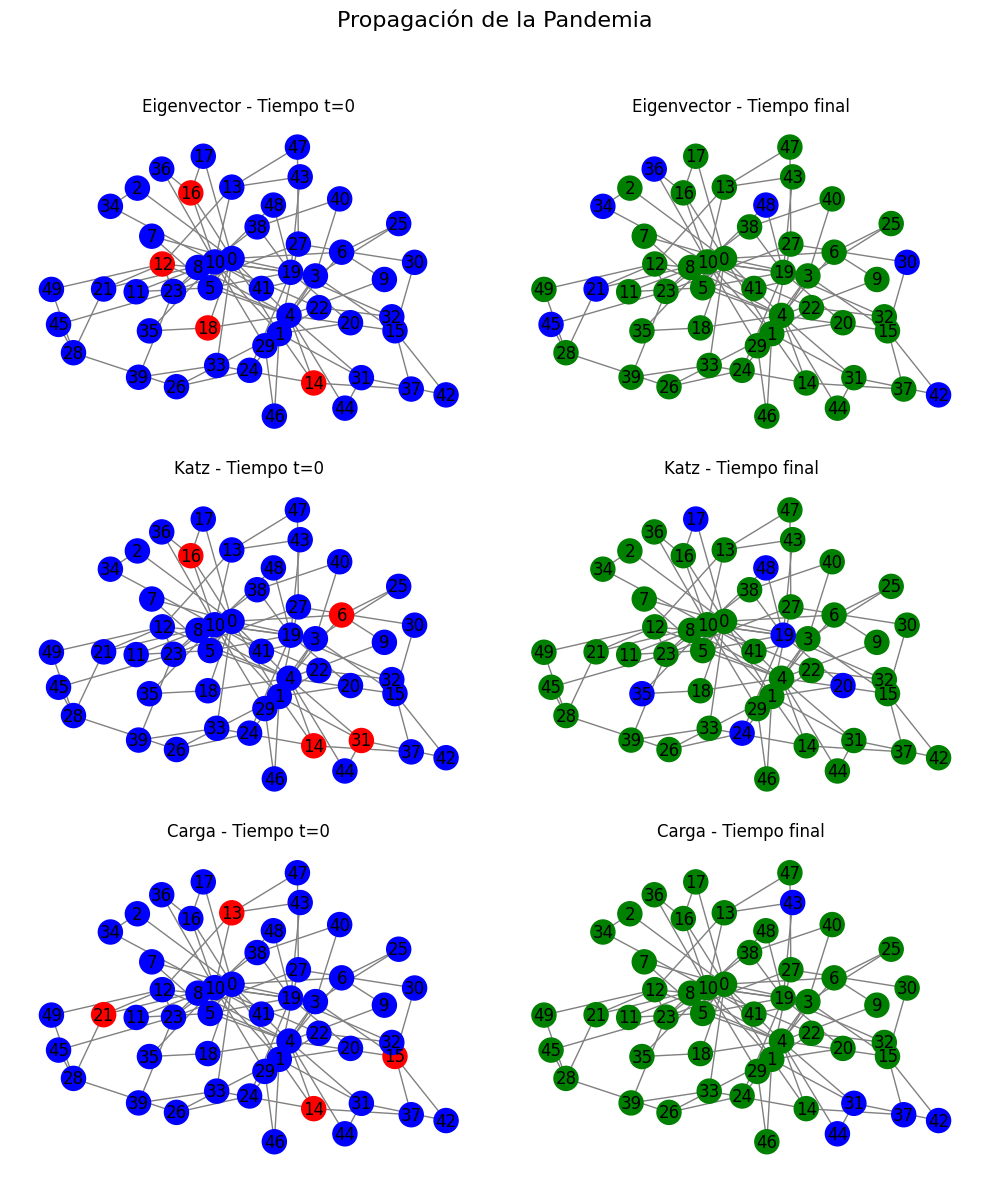

In [ ]:
#Patients Zero: Eigenvector, Katz, Load
#Ranking: HIGHEST
#Shift: 10

import networkx as nx
import numpy as np
import random
import matplotlib.pyplot as plt

# ------------------------
# Parameters
# ------------------------
N = 50
m = 2
beta = 0.1
gamma = 0.1
dt = 1.0

p_infect = 1 - np.exp(-beta * dt)
p_recover = 1 - np.exp(-gamma * dt)

# ------------------------
# Build graph and layout
# ------------------------
G = nx.barabasi_albert_graph(N, m)
pos = nx.spring_layout(G, seed=42)

# ------------------------
# Centrality measures
# ------------------------
centrality_measures = {
    "Eigenvector": nx.eigenvector_centrality(G, max_iter=1000),
    "Katz": nx.katz_centrality(G, alpha=0.005, beta=1.0, max_iter=1000),
    "Carga": nx.load_centrality(G)
}

# ------------------------
# SIR Simulation
# ------------------------
def run_sir_with_snapshots(G, patient_zeros):
    SUS, INF, REC = 0, 1, 2
    state = [SUS] * N
    for node in patient_zeros:
        state[node] = INF

    history = [state.copy()]
    t = 0

    while INF in state:
        new_infected = []
        for u, s in enumerate(state):
            if s == INF:
                for v in G.neighbors(u):
                    if state[v] == SUS and random.random() < p_infect:
                        new_infected.append(v)
                if random.random() < p_recover:
                    state[u] = REC
        for v in new_infected:
            if state[v] == SUS:
                state[v] = INF
        t += 1
        history.append(state.copy())

    return history, t

# ------------------------
# Draw Network
# ------------------------
def draw_network(G, state, pos, title=""):
    color_map = {0: 'blue', 1: 'red', 2: 'green'}
    node_colors = [color_map[s] for s in state]
    nx.draw(G, pos, node_color=node_colors, with_labels=True, node_size=300, edge_color='gray')
    plt.title(title)
    plt.axis('off')

# ------------------------
# Visualize: Bottom Nodes as Patient Zeros
# ------------------------
bottom_k = 4
shift=10
rows = len(centrality_measures)
fig, axs = plt.subplots(rows, 2, figsize=(10, 4 * rows))

if rows == 1:
    axs = np.array([axs])

for i, (name, cent) in enumerate(centrality_measures.items()):
    sorted_nodes = sorted(cent, key=cent.get, reverse=True)
    bottom_nodes = sorted_nodes[shift:shift+bottom_k]

    history, t_final = run_sir_with_snapshots(G, bottom_nodes)

    axs[i, 0].cla()
    plt.sca(axs[i, 0])
    draw_network(G, history[0], pos, title=f"{name} - Tiempo t=0")

    axs[i, 1].cla()
    plt.sca(axs[i, 1])
    draw_network(G, history[-1], pos, title=f"{name} - Tiempo final")

plt.suptitle("Propagación de la Pandemia", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


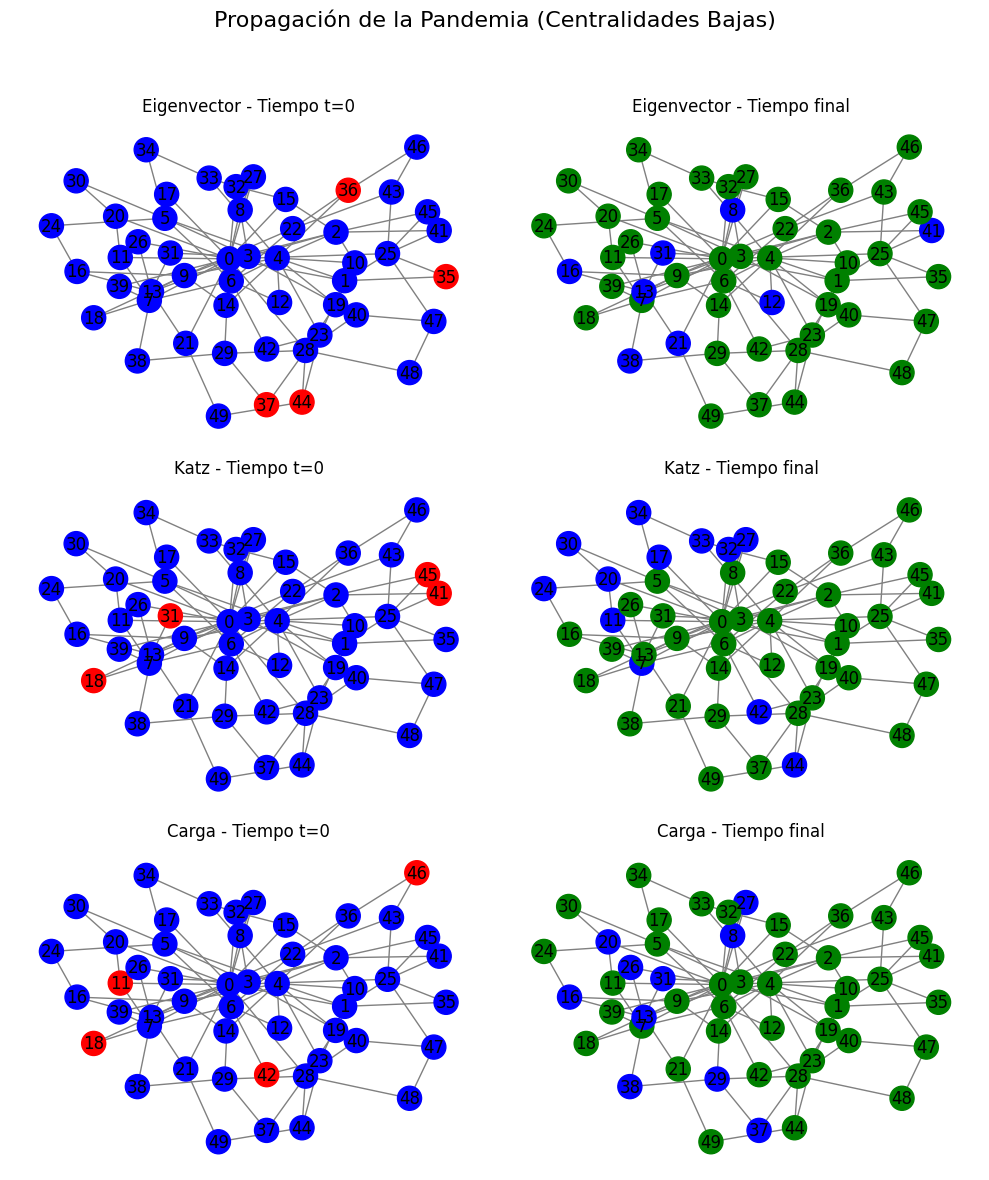

In [ ]:
#Patients Zero: Eigenvector, Katz, Load
#Ranking: LOWEST
#Shift: 10

import networkx as nx
import numpy as np
import random
import matplotlib.pyplot as plt

# ------------------------
# Parameters
# ------------------------
N = 50
m = 2
beta = 0.07
gamma = 0.1
dt = 1.0

p_infect = 1 - np.exp(-beta * dt)
p_recover = 1 - np.exp(-gamma * dt)

# ------------------------
# Build graph and layout
# ------------------------
G = nx.barabasi_albert_graph(N, m)
pos = nx.spring_layout(G, seed=42)

# ------------------------
# Centrality measures
# ------------------------
centrality_measures = {
    "Eigenvector": nx.eigenvector_centrality(G, max_iter=1000),
    "Katz": nx.katz_centrality(G, alpha=0.005, beta=1.0, max_iter=1000),
    "Carga": nx.load_centrality(G)
}

# ------------------------
# SIR Simulation
# ------------------------
def run_sir_with_snapshots(G, patient_zeros):
    SUS, INF, REC = 0, 1, 2
    state = [SUS] * N
    for node in patient_zeros:
        state[node] = INF

    history = [state.copy()]
    t = 0

    while INF in state:
        new_infected = []
        for u, s in enumerate(state):
            if s == INF:
                for v in G.neighbors(u):
                    if state[v] == SUS and random.random() < p_infect:
                        new_infected.append(v)
                if random.random() < p_recover:
                    state[u] = REC
        for v in new_infected:
            if state[v] == SUS:
                state[v] = INF
        t += 1
        history.append(state.copy())

    return history, t

# ------------------------
# Draw Network
# ------------------------
def draw_network(G, state, pos, title=""):
    color_map = {0: 'blue', 1: 'red', 2: 'green'}
    node_colors = [color_map[s] for s in state]
    nx.draw(G, pos, node_color=node_colors, with_labels=True, node_size=300, edge_color='gray')
    plt.title(title)
    plt.axis('off')

# ------------------------
# Visualize: Bottom Nodes as Patient Zeros
# ------------------------
bottom_k = 4
shift=10
rows = len(centrality_measures)
fig, axs = plt.subplots(rows, 2, figsize=(10, 4 * rows))

if rows == 1:
    axs = np.array([axs])

for i, (name, cent) in enumerate(centrality_measures.items()):
    sorted_nodes = sorted(cent, key=cent.get, reverse=True)
    bottom_nodes = sorted_nodes[-shift-bottom_k:-shift]

    history, t_final = run_sir_with_snapshots(G, bottom_nodes)

    axs[i, 0].cla()
    plt.sca(axs[i, 0])
    draw_network(G, history[0], pos, title=f"{name} - Tiempo t=0")

    axs[i, 1].cla()
    plt.sca(axs[i, 1])
    draw_network(G, history[-1], pos, title=f"{name} - Tiempo final")

plt.suptitle("Propagación de la Pandemia (Centralidades Bajas)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


# Multiple Runs and Average Behavior

In this section the aforementioned method is followed, but now focusing only on infections and cumulative infections at each time (for definitions of these quantities, refer to the paper). A total of 100 simulations were performed to obtained the average behavior.

Grado centrality -> Top 3 nodes: [7, 27, 28]
Grado centrality -> Bottom 3 nodes: [987, 988, 989]
Betweenness centrality -> Top 3 nodes: [34, 71, 27]
Betweenness centrality -> Bottom 3 nodes: [273, 537, 578]
Cercanía centrality -> Top 3 nodes: [9, 6, 3]
Cercanía centrality -> Bottom 3 nodes: [655, 919, 543]
Eigenvector centrality -> Top 3 nodes: [13, 3, 10]
Eigenvector centrality -> Bottom 3 nodes: [922, 291, 685]
Katz centrality -> Top 3 nodes: [2, 27, 28]
Katz centrality -> Bottom 3 nodes: [543, 908, 665]
Carga centrality -> Top 3 nodes: [34, 71, 27]
Carga centrality -> Bottom 3 nodes: [273, 537, 578]


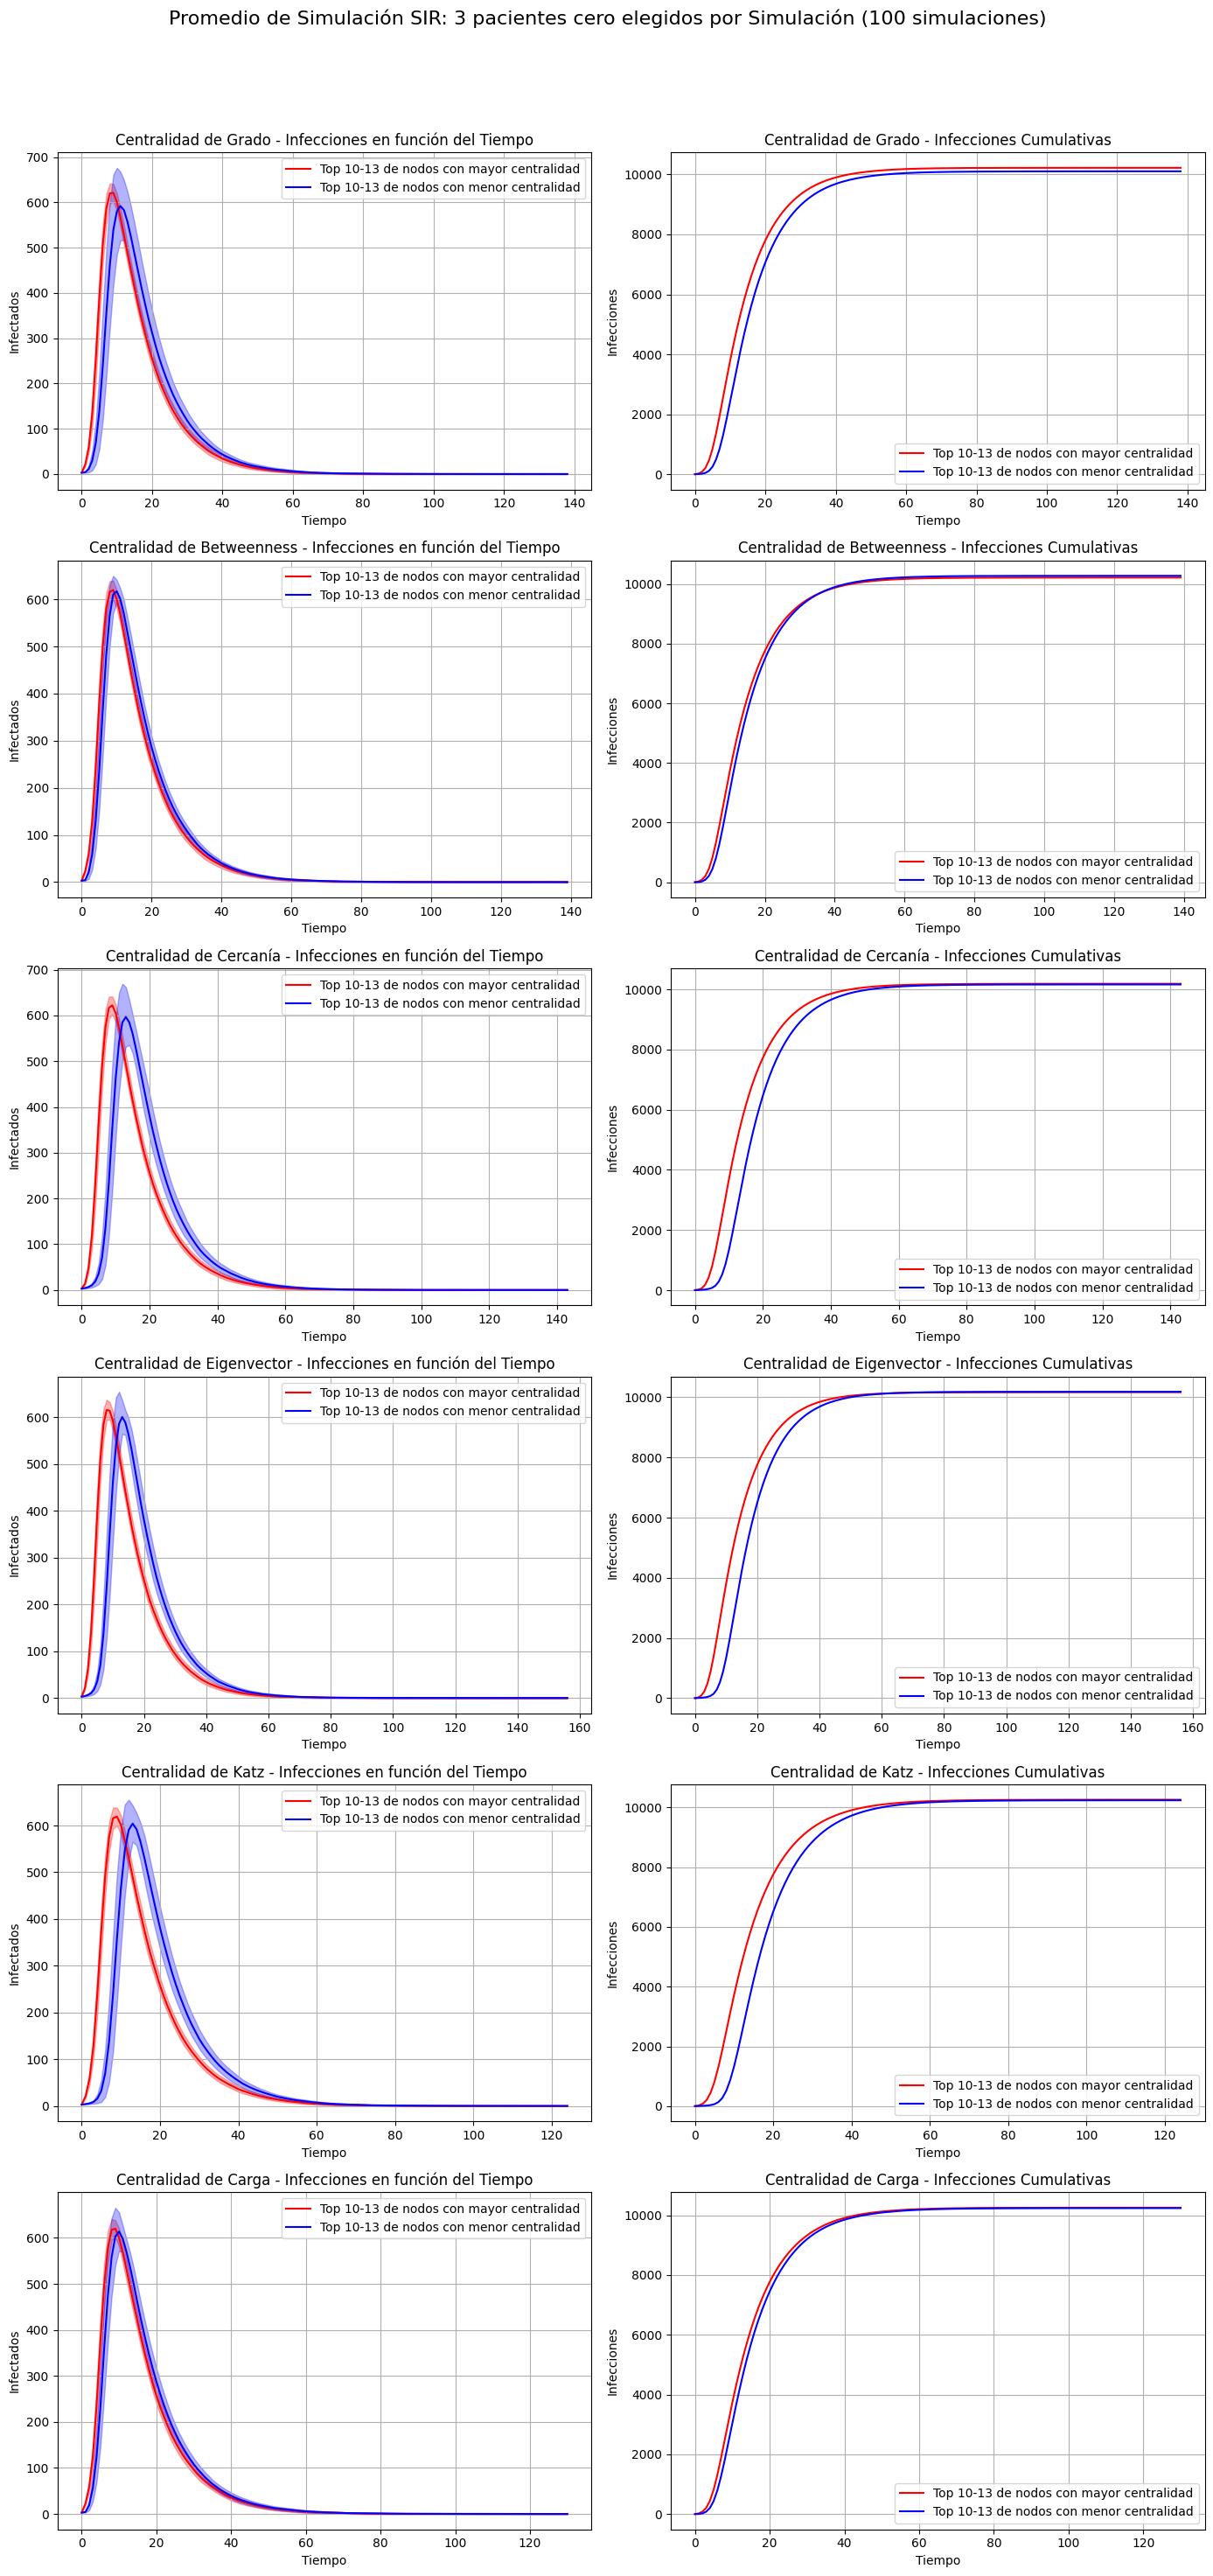

In [ ]:
import networkx as nx
import numpy as np
import random
import matplotlib.pyplot as plt

# ------------------------
# Parameters
# ------------------------
N = 1000
m = 2
beta = 0.3
gamma = 0.1
dt = 1.0
num_simulations = 100

p_infect = 1 - np.exp(-beta * dt)
p_recover = 1 - np.exp(-gamma * dt)

# ------------------------
# Build network
# ------------------------
G = nx.barabasi_albert_graph(N, m)

# ------------------------
# Centrality measures
# ------------------------
centrality_measures = {
    "Grado": nx.degree_centrality(G),
    "Betweenness": nx.betweenness_centrality(G),
    "Cercanía": nx.closeness_centrality(G),
    "Eigenvector": nx.eigenvector_centrality(G, max_iter=1000),
    "Katz": nx.katz_centrality(G, alpha=0.005, beta=1.0, max_iter=1000),
    "Carga": nx.load_centrality(G)
}

# ------------------------
# SIR simulation
# ------------------------
def run_sir_multiple_zeros(G, patient_zeros):
    SUS, INF, REC = 0, 1, 2
    state = [SUS] * N
    for node in patient_zeros:
        state[node] = INF

    I_list = []

    while INF in state:
        I_list.append(state.count(INF))
        new_infected = []
        for u, s in enumerate(state):
            if s == INF:
                for v in G.neighbors(u):
                    if state[v] == SUS and random.random() < p_infect:
                        new_infected.append(v)
                if random.random() < p_recover:
                    state[u] = REC
        for v in new_infected:
            if state[v] == SUS:
                state[v] = INF

    I_list.append(state.count(INF))
    return I_list

def run_multiple_sims_group(G, patient_zeros, num_sim):
    all_I = []
    max_len = 0
    for _ in range(num_sim):
        I = run_sir_multiple_zeros(G, patient_zeros)
        all_I.append(I)
        max_len = max(max_len, len(I))
    all_I_padded = []
    for I in all_I:
        I_padded = I + [0] * (max_len - len(I))
        all_I_padded.append(I_padded)
    return np.array(all_I_padded)

def pad_to_length(arr, length):
    padded = []
    for row in arr:
        padded_row = row.tolist() + [0] * (length - len(row))
        padded.append(padded_row)
    return np.array(padded)

# ------------------------
# Run simulations for each centrality
# ------------------------
results = {}

shift=10
top_k = 3
bottom_k = 3

for name, cent in centrality_measures.items():
    sorted_nodes = sorted(cent, key=cent.get, reverse=True)
    top_nodes = sorted_nodes[shift:shift+top_k]
    bottom_nodes = sorted_nodes[-shift-bottom_k:-shift]

    print(f"{name} centrality -> Top {top_k} nodes: {top_nodes}")
    print(f"{name} centrality -> Bottom {bottom_k} nodes: {bottom_nodes}")

    I_top_runs = run_multiple_sims_group(G, top_nodes, num_simulations)
    I_bottom_runs = run_multiple_sims_group(G, bottom_nodes, num_simulations)

    overall_max_len = max(I_top_runs.shape[1], I_bottom_runs.shape[1])
    I_top_runs = pad_to_length(I_top_runs, overall_max_len)
    I_bottom_runs = pad_to_length(I_bottom_runs, overall_max_len)

    mean_top = I_top_runs.mean(axis=0)
    std_top = I_top_runs.std(axis=0)
    mean_bottom = I_bottom_runs.mean(axis=0)
    std_bottom = I_bottom_runs.std(axis=0)
    time = np.arange(overall_max_len)

    results[name] = (time, mean_top, std_top, mean_bottom, std_bottom)

# ------------------------
# Plot all centralities with cumulative infections
# ------------------------
rows = len(centrality_measures)
fig, axs = plt.subplots(rows, 2, figsize=(14, 5 * rows))

if rows == 1:
    axs = np.array([axs])  # Make sure axs is always 2D

for i, (name, (time, mean_top, std_top, mean_bottom, std_bottom)) in enumerate(results.items()):
    ax_left = axs[i, 0]
    ax_right = axs[i, 1]

    # Plot currently infected
    ax_left.plot(time, mean_top, 'r-', label=f'Top {shift}-{shift+top_k} de nodos con mayor centralidad')
    ax_left.fill_between(time, mean_top - std_top, mean_top + std_top, color='r', alpha=0.3)
    ax_left.plot(time, mean_bottom, 'b-', label=f'Top {shift}-{shift+top_k} de nodos con menor centralidad')
    ax_left.fill_between(time, mean_bottom - std_bottom, mean_bottom + std_bottom, color='b', alpha=0.3)
    ax_left.set_title(f"Centralidad de {name} - Infecciones en función del Tiempo")
    ax_left.set_xlabel("Tiempo")
    ax_left.set_ylabel("Infectados")
    ax_left.legend()
    ax_left.grid(True)

    # Plot cumulative infections
    cum_top = np.cumsum(mean_top)
    cum_bottom = np.cumsum(mean_bottom)
    ax_right.plot(time, cum_top, 'r-', label=f'Top {shift}-{shift+top_k} de nodos con mayor centralidad')
    ax_right.plot(time, cum_bottom, 'b-', label=f'Top {shift}-{shift+top_k} de nodos con menor centralidad')
    ax_right.set_title(f"Centralidad de {name} - Infecciones Cumulativas")
    ax_right.set_xlabel("Tiempo")
    ax_right.set_ylabel("Infecciones")
    ax_right.legend()
    ax_right.grid(True)

plt.suptitle(f"Promedio de Simulación SIR: {top_k} pacientes cero elegidos por Simulación ({num_simulations} simulaciones)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

